<a href="https://colab.research.google.com/github/Rullyro/tubesandat/blob/main/tubesanalisisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Library

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import statistics as stat
import seaborn as sns
import scipy as stats
from scipy.stats import ttest_1samp, ttest_ind

Load Dataset

In [31]:
col_names = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm', 'Class']
feature_cols = ['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']
ppm_cols = ['N_NO3 ppm', 'P ppm', 'K ppm', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tanahnew.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,1,42,38,20,5.16,0.27,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,2,54,26,20,6.07,0.36,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,3,28,36,36,6.92,0.68,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,4,58,20,22,7.70,0.36,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,Tidak Optimal
4,5,33,41,26,7.61,0.39,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,Tidak Optimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26,46,28,6.72,0.45,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33,Optimal
777,778,40,28,32,7.79,0.34,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12,Tidak Optimal
778,779,34,28,38,7.63,1.14,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26,Tidak Optimal
779,780,16,38,46,7.73,0.39,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27,Tidak Optimal


In [4]:
df.rename(columns = {'Sand %':'Sand', 
                     'Clay %' : 'Clay', 
                     'Silt %' : 'Silt', 
                     'EC mS/cm' : 'EC', 
                     'O.M. %' : 'OM', 
                     'CACO3 %' : 'CACO3', 
                     'N_NO3 ppm' : 'N_NO3/ppm',
                     'P ppm' : 'P/ppm',
                     'Mg ppm' : 'Mg/ppm',
                     'Fe ppm' : 'Fe/ppm',
                     'Zn ppm' : 'Zn/ppm',
                     'Mn ppm' : 'Mn/ppm',
                     'Cu ppm' : 'Cu/ppm',
                     'B ppm' : 'B/ppm',
                     'K ppm' : 'K/ppm',
                     }, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         781 non-null    int64  
 1   Sand       781 non-null    int64  
 2   Clay       781 non-null    int64  
 3   Silt       781 non-null    int64  
 4   pH         781 non-null    float64
 5   EC         781 non-null    float64
 6   OM         781 non-null    float64
 7   CACO3      781 non-null    float64
 8   N_NO3/ppm  781 non-null    float64
 9   P/ppm      781 non-null    float64
 10  K ppm      781 non-null    int64  
 11  Mg/ppm     781 non-null    int64  
 12  Fe/ppm     781 non-null    float64
 13  Zn/ppm     781 non-null    float64
 14  Mn/ppm     780 non-null    float64
 15  Cu/ppm     781 non-null    float64
 16  B/ppm      781 non-null    float64
 17  Class      781 non-null    object 
dtypes: float64(11), int64(6), object(1)
memory usage: 110.0+ KB


# **Basic Descriptive Statistic**

## Describe

In [5]:
df.describe()

,ID,Sand,Clay,Silt,pH,EC,OM,CACO3,N_NO3/ppm,P/ppm,K ppm,Mg/ppm,Fe/ppm,Zn/ppm,Mn/ppm,Cu/ppm,B/ppm
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,780.000000,781.000000,781.000000
mean,391.000000,31.528809,34.998720,33.475032,7.133662,0.453252,2.028899,13.422049,11.623367,13.840627,296.226633,821.025608,31.203355,0.674789,15.870500,2.031472,0.383828
std,225.599572,10.978452,11.252065,8.382886,0.897815,0.304888,0.627254,13.381635,11.052076,14.586021,194.461073,742.228950,26.013775,0.680787,15.169134,2.455696,0.222063
min,1.000000,10.000000,6.000000,14.000000,4.490000,0.130000,0.370000,0.000000,0.180000,1.070000,31.000000,60.000000,4.630000,0.100000,2.380000,0.210000,0.100000
25%,196.000000,24.000000,28.000000,28.000000,6.660000,0.340000,1.590000,1.800000,5.280000,5.730000,169.000000,364.000000,13.210000,0.310000,6.750000,1.080000,0.230000
50%,391.000000,30.000000,36.000000,32.000000,7.550000,0.400000,1.960000,8.710000,8.850000,9.490000,255.000000,568.000000,19.870000,0.480000,10.105000,1.480000,0.350000
75%,586.000000,38.000000,44.000000,38.000000,7.780000,0.500000,2.370000,22.000000,14.310000,15.980000,358.000000,1010.000000,43.150000,0.770000,19.162500,2.130000,0.480000
max,781.000000,70.000000,64.000000,68.000000,8.200000,5.620000,4.980000,77.600000,120.640000,152.420000,1665.000000,4836.000000,187.940000,7.090000,189.210000,33.910000,1.900000


## Distribusi salah satu data (pH)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


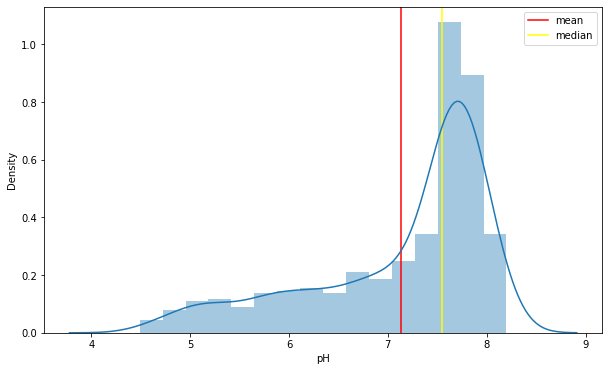

In [6]:
plt.figure(figsize = (10, 6))
plt.axvline(df['pH'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['pH'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['pH'])
plt.legend()

## Mean

In [6]:
df.mean(numeric_only=True)

ID           391.000000
Sand          31.528809
Clay          34.998720
Silt          33.475032
pH             7.133662
EC             0.453252
OM             2.028899
CACO3         13.422049
N_NO3/ppm     11.623367
P/ppm         13.840627
K ppm        296.226633
Mg/ppm       821.025608
Fe/ppm        31.203355
Zn/ppm         0.674789
Mn/ppm        15.870500
Cu/ppm         2.031472
B/ppm          0.383828
dtype: float64

## Median

In [5]:
df.median(numeric_only=True)

ID           391.000
Sand          30.000
Clay          36.000
Silt          32.000
pH             7.550
EC             0.400
OM             1.960
CACO3          8.710
N_NO3/ppm      8.850
P/ppm          9.490
K ppm        255.000
Mg/ppm       568.000
Fe/ppm        19.870
Zn/ppm         0.480
Mn/ppm        10.105
Cu/ppm         1.480
B/ppm          0.350
dtype: float64

## Mencari rata-rata pH terhadap tiap jenis tanah

In [17]:
rataSand = df.groupby('Sand')['pH'].mean()
rataSilt = df.groupby('Silt')['pH'].mean()
rataClay = df.groupby('Clay')['pH'].mean()

print("Rata rata pH terhadap Sand \n",rataSand)
print("\n")
print("Rata rata pH terhadap Silt \n",rataSilt)
print("\n")
print("Rata rata pH terhadap Clay \n",rataClay)

Rata rata pH terhadap Sand 
 Sand
10    7.899000
12    7.790000
14    7.643846
16    7.595862
18    7.441538
20    7.433478
22    7.277222
24    7.396250
26    7.187273
27    5.700000
28    7.226724
29    6.280000
30    7.115902
31    7.550000
32    6.871111
33    7.610000
34    7.095227
36    7.060000
37    6.470000
38    6.768462
40    7.271458
42    6.954242
43    6.630000
44    6.626786
46    7.371000
47    6.880000
48    6.430370
50    6.796667
52    7.493750
54    6.510909
56    5.817143
58    7.193333
62    7.302500
64    6.780000
66    5.542500
68    7.465000
70    5.800000
Name: pH, dtype: float64


Rata rata pH terhadap Silt 
 Silt
14    7.170000
16    7.560000
18    6.976000
20    6.856667
22    6.933333
24    6.851364
26    6.965000
28    6.909398
30    6.833125
32    7.137073
34    7.126271
36    7.210833
38    7.385932
40    7.326512
42    7.097632
44    7.750370
46    7.390833
48    7.752857
50    7.776667
52    7.591818
54    7.195000
56    7.935000
58    7.806667
60   

## Measure of Spread

### Standard Deviasi

In [11]:
df.std(numeric_only=True)

ID           225.599572
Sand          10.978452
Clay          11.252065
Silt           8.382886
pH             0.897815
EC             0.304888
OM             0.627254
CACO3         13.381635
N_NO3/ppm     11.052076
P/ppm         14.586021
K ppm        194.461073
Mg/ppm       742.228950
Fe/ppm        26.013775
Zn/ppm         0.680787
Mn/ppm        15.169134
Cu/ppm         2.455696
B/ppm          0.222063
dtype: float64

## Boxplot Check
Jenis tanah terhadap nilai pH

In [19]:
inc_cond = list(df['Sand'].unique())
len(inc_cond)

37

In [12]:
# Mencari perbedaan pendapatan antara tiap item dalam Sand
inc_cond = list(df['Sand'].unique())
list_data= range(37)
alpha=0.05

for i in list_data:
  for j in list_data[i+1:]:
    group1 = df[df['Sand']==inc_cond[i]]["pH"]
    group2 = df[df['Sand']==inc_cond[j]]["pH"]
    stat, p = ttest_ind(group1, group2)
    # print(group1, group2)
    print('=======================================================================')
    print('t=%.3f, p=%.3f' % (stat, p))
    # interpret via p-value
    if p < alpha:
      print('Tolak H0, maka harga pH pada Sand {} tidak sama dengan {}.'.format(inc_cond[i], inc_cond[j]))
    else:
      print('Gagal Tolak H0, maka harga pH pada Sand {} sama dengan {}.'.format(inc_cond[i], inc_cond[j]))

t=1.300, p=0.201
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 54.
t=-1.390, p=0.168
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 28.
t=-0.409, p=0.685
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 58.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 33.
t=0.978, p=0.335
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 29.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 37.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 27.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 31.
t=-0.814, p=0.418
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 30.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 43.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 47.
t=-1.495, p=0.143
Gagal Tolak H0, maka harga pH pada Sand 42 sama dengan 52.
t=-2.376, p=0.021
Tolak H0, maka harga pH pada Sand 42 tidak sama dengan 18.
t=-1.689, p=0.095
Gagal Tolak H

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



t=-1.234, p=0.243
Gagal Tolak H0, maka harga pH pada Sand 54 sama dengan 68.
t=1.760, p=0.102
Gagal Tolak H0, maka harga pH pada Sand 54 sama dengan 66.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 54 sama dengan 64.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 54 sama dengan 70.
t=0.065, p=0.949
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 58.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 33.
t=1.537, p=0.130
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 29.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 37.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 27.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 31.
t=0.687, p=0.494
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 30.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 43.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Sand 28 sama dengan 47.
t=-0.838, p=0.405
Gagal Tolak H0, maka har

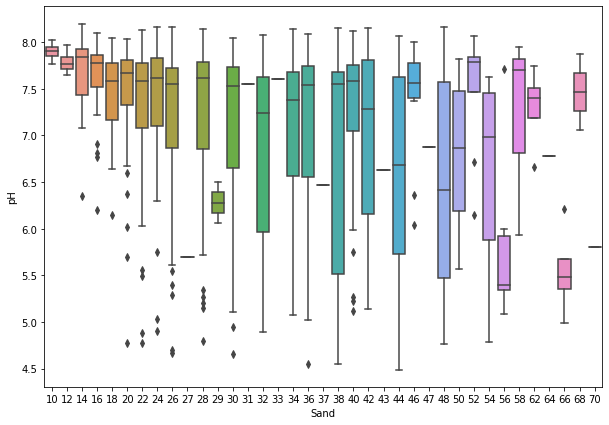

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Sand", y = "pH", data = df)

In [15]:
inc_cond = list(df['Silt'].unique())
len(inc_cond)

27

In [17]:
# Mencari perbedaan pendapatan antara tiap item dalam Silt
inc_cond = list(df['Silt'].unique())
list_data= range(27)
alpha=0.05

for i in list_data:
  for j in list_data[i+1:]:
    group1 = df[df['Silt']==inc_cond[i]]["pH"]
    group2 = df[df['Silt']==inc_cond[j]]["pH"]
    stat, p = ttest_ind(group1, group2)
    # print(group1, group2)
    print('=======================================================================')
    print('t=%.3f, p=%.3f' % (stat, p))
    # interpret via p-value
    if p < alpha:
      print('Tolak H0, maka harga pH pada Silt {} tidak sama dengan {}.'.format(inc_cond[i], inc_cond[j]))
    else:
      print('Gagal Tolak H0, maka harga pH pada Silt {} sama dengan {}.'.format(inc_cond[i], inc_cond[j]))

t=-1.514, p=0.134
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 36.
t=-0.337, p=0.737
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 22.
t=-0.467, p=0.642
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 26.
t=0.022, p=0.983
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 24.
t=-0.205, p=0.838
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 28.
t=0.086, p=0.932
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 30.
t=-1.121, p=0.266
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 34.
t=-5.993, p=0.000
Tolak H0, maka harga pH pada Silt 20 tidak sama dengan 44.
t=-1.046, p=0.298
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 32.
t=-3.807, p=0.001
Tolak H0, maka harga pH pada Silt 20 tidak sama dengan 50.
t=-2.137, p=0.039
Tolak H0, maka harga pH pada Silt 20 tidak sama dengan 46.
t=-2.524, p=0.014
Tolak H0, maka harga pH pada Silt 20 tidak sama dengan 38.
t=-0.859, p=0.394
Gagal Tolak H0, maka harga pH pada Silt 20 sama dengan 42.
t

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



t=-0.713, p=0.480
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 54.
t=-3.874, p=0.000
Tolak H0, maka harga pH pada Silt 22 tidak sama dengan 48.
t=-1.369, p=0.179
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 16.
t=-1.905, p=0.065
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 58.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 60.
t=-0.157, p=0.876
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 18.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 66.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 64.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 68.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Silt 22 sama dengan 14.
t=0.682, p=0.497
Gagal Tolak H0, maka harga pH pada Silt 26 sama dengan 24.
t=0.371, p=0.712
Gagal Tolak H0, maka harga pH pada Silt 26 sama dengan 28.
t=0.835, p=0.405
Gagal Tolak H0, maka harga pH pada Silt 26 sama dengan 30.
t=-1.046, p=0.297
Gagal To

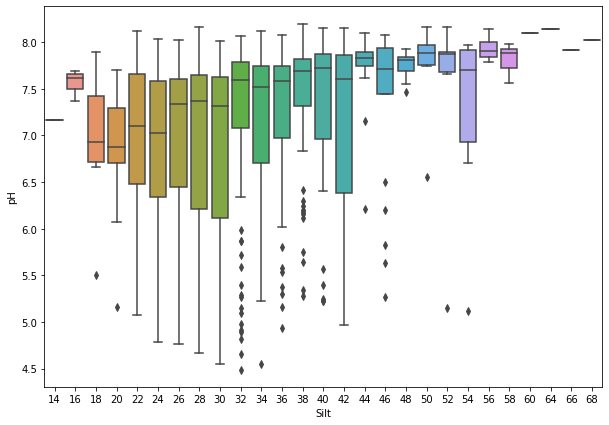

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Silt", y = "pH", data = df)

In [22]:
inc_cond = list(df['Clay'].unique())
len(inc_cond)

38

In [23]:
# Mencari perbedaan pendapatan antara tiap item dalam Silt
inc_cond = list(df['Clay'].unique())
list_data= range(38)
alpha=0.05

for i in list_data:
  for j in list_data[i+1:]:
    group1 = df[df['Clay']==inc_cond[i]]["pH"]
    group2 = df[df['Clay']==inc_cond[j]]["pH"]
    stat, p = ttest_ind(group1, group2)
    # print(group1, group2)
    print('=======================================================================')
    print('t=%.3f, p=%.3f' % (stat, p))
    # interpret via p-value
    if p < alpha:
      print('Tolak H0, maka harga pH pada Clay {} tidak sama dengan {}.'.format(inc_cond[i], inc_cond[j]))
    else:
      print('Gagal Tolak H0, maka harga pH pada Clay {} sama dengan {}.'.format(inc_cond[i], inc_cond[j]))

t=1.554, p=0.124
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 26.
t=0.935, p=0.352
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 36.
t=2.308, p=0.024
Tolak H0, maka harga pH pada Clay 38 tidak sama dengan 20.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 41.
t=2.465, p=0.017
Tolak H0, maka harga pH pada Clay 38 tidak sama dengan 47.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 35.
t=1.185, p=0.242
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 45.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 33.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 27.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 29.
t=nan, p=nan
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 21.
t=1.535, p=0.129
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 24.
t=0.684, p=0.496
Gagal Tolak H0, maka harga pH pada Clay 38 sama dengan 42.
t=2.700, p=0.009
Tolak H0, maka harg

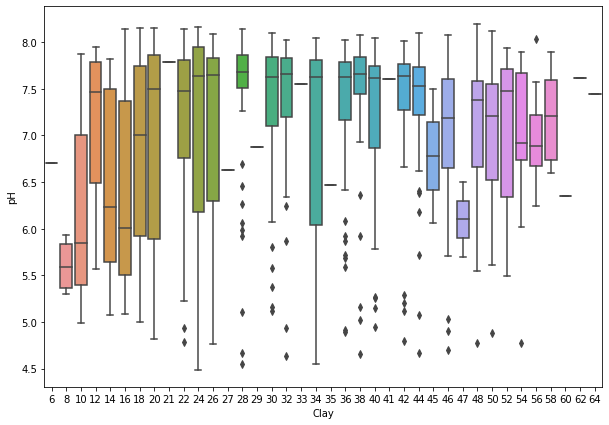

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Clay", y = "pH", data = df)

# **Statistik Inferensial**

In [ ]:
df.head()

## Uji Hipotesis
### Jenis tanah terhadap tanah yang lainnya

In [22]:
alpha = 0.05

stat, p = ttest_ind(df['Sand'], df['Silt'])

print('t=%.3f, p=%.3f' % (stat, p))

# Uji hipotesis
if p < alpha:
    print('Tolak H0 sehingga Sand tidak sama dengan Silt')
else:
    print('Gagal Tolak H0, sehingga Sand sama dengan Silt')

t=-3.938, p=0.000
Tolak H0 sehingga Sand tidak sama dengan Silt


In [23]:
alpha = 0.05

stat, p = ttest_ind(df['Silt'], df['Clay'])

print('t=%.3f, p=%.3f' % (stat, p))

# Uji hipotesis
if p < alpha:
    print('Tolak H0 sehingga Silt tidak sama dengan Clay')
else:
    print('Gagal Tolak H0, sehingga Silt sama dengan Clay')

t=-3.035, p=0.002
Tolak H0 sehingga Silt tidak sama dengan Clay


In [24]:
alpha = 0.05

stat, p = ttest_ind(df['Clay'], df['Sand'])

print('t=%.3f, p=%.3f' % (stat, p))

# Uji hipotesis
if p < alpha:
    print('Tolak H0 sehingga Clay tidak sama dengan Sand')
else:
    print('Gagal Tolak H0, sehingga Clay sama dengan Sand')

t=6.168, p=0.000
Tolak H0 sehingga Clay tidak sama dengan Sand


# **Data Preparataion**


In [26]:
df.head()

,ID,Sand,Clay,Silt,pH,EC,OM,CACO3,N_NO3/ppm,P/ppm,K ppm,Mg/ppm,Fe/ppm,Zn/ppm,Mn/ppm,Cu/ppm,B/ppm,Class
0,1,42,38,20,5.16,0.27,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,2,54,26,20,6.07,0.36,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,3,28,36,36,6.92,0.68,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,4,58,20,22,7.70,0.36,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,Tidak Optimal
4,5,33,41,26,7.61,0.39,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,Tidak Optimal


In [37]:
# Normalisasi
sc = MinMaxScaler(feature_range=(0, 1))
pd.DataFrame(data=sc.fit_transform(df.iloc[:,8:17]),columns=ppm_cols, inplace = True)

TypeError: ignored

In [36]:
df.head()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class
0,1,42,38,20,5.16,0.27,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40,Tidak Optimal
1,2,54,26,20,6.07,0.36,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41,Optimal
2,3,28,36,36,6.92,0.68,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46,Optimal
3,4,58,20,22,7.70,0.36,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50,Tidak Optimal
4,5,33,41,26,7.61,0.39,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40,Tidak Optimal


In [28]:
# Konversi EC
df['EC']=df['EC']*10
df['EC'].describe()

count    781.000000
mean       4.532522
std        3.048878
min        1.300000
25%        3.400000
50%        4.000000
75%        5.000000
max       56.200000
Name: EC, dtype: float64

## Splitting Feature & Class

In [28]:
X = df.iloc[:,1:17] # Features
Y = pd.DataFrame(df['Class']) # Target variable

In [29]:
X

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42,38,20,5.16,2.7,3.78,0.00,14.46,18.61,147,1115,91.32,0.89,27.06,1.77,0.40
1,54,26,20,6.07,3.6,1.45,0.00,14.59,32.74,180,1055,60.04,3.66,17.58,1.68,0.41
2,28,36,36,6.92,6.8,1.77,0.40,14.91,19.02,183,1215,61.24,3.06,18.00,1.84,0.46
3,58,20,22,7.70,3.6,0.72,6.80,4.21,6.28,116,327,19.54,1.64,5.04,0.84,0.50
4,33,41,26,7.61,3.9,1.00,4.39,6.11,6.55,228,939,25.84,0.18,7.16,1.22,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,26,46,28,6.72,4.5,2.08,0.00,7.66,20.67,395,500,38.07,0.39,26.48,1.47,0.33
777,40,28,32,7.79,3.4,1.38,30.00,5.20,4.14,286,154,12.79,0.24,6.33,0.60,0.12
778,34,28,38,7.63,11.4,1.87,24.30,17.13,6.90,582,164,10.73,0.44,5.39,1.14,0.26
779,16,38,46,7.73,3.9,1.72,46.30,3.92,7.93,335,572,11.61,0.26,3.77,2.20,0.27


## **Missing Value**

In [33]:
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

ID           0
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       0
Cu ppm       0
B ppm        0
Class        0
dtype: int64

In [31]:
df['Mn ppm'].fillna(int(df['Mn ppm'].mean()), inplace=True)

## **Duplicate Data**

In [35]:
# Cek Data Duplicate
ids = df["ID"]
df[ids.isin(ids[ids.duplicated()])]

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm,Class


## Cek Tipe Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         781 non-null    int64  
 1   Sand %     781 non-null    int64  
 2   Clay %     781 non-null    int64  
 3   Silt %     781 non-null    int64  
 4   pH         781 non-null    float64
 5   EC mS/cm   781 non-null    float64
 6   O.M. %     781 non-null    float64
 7   CACO3 %    781 non-null    float64
 8   N_NO3 ppm  781 non-null    float64
 9   P ppm      781 non-null    float64
 10  K ppm      781 non-null    int64  
 11  Mg ppm     781 non-null    int64  
 12  Fe ppm     781 non-null    float64
 13  Zn ppm     781 non-null    float64
 14  Mn ppm     781 non-null    float64
 15  Cu ppm     781 non-null    float64
 16  B ppm      781 non-null    float64
 17  Class      781 non-null    object 
dtypes: float64(11), int64(6), object(1)
memory usage: 110.0+ KB


###  **Modelling**

Membangun Train Test Data

Membangun Model Classifier